In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [01:03<00:00, 39.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf

In [3]:
image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    brightness_range=[0.9, 1.1],
    horizontal_flip=False,
    fill_mode='nearest'
)

image_generator_test = ImageDataGenerator(
    rescale=1./255,
)

# Load training data
train_data = image_generator.flow_from_directory(
    f'{path}/chest_xray/train',  # Path to the training directory
    target_size=(256, 256),      # Resize images to 256x256
    color_mode='grayscale',      # Use grayscale for chest X-rays
    batch_size=64,               # Batch size of 64 images per iteration
    class_mode='binary',         # Binary classification (Normal vs Pneumonia)
    subset='training'            # This is the training subset
)

# Load test data
test_data = image_generator_test.flow_from_directory(
    f'{path}/chest_xray/test',  # Path to the test directory
    target_size=(256, 256),     # Resize images to 256x256
    batch_size=64,              # Batch size of 64 images per iteration
    color_mode='grayscale',     # Use grayscale for chest X-rays
    class_mode='binary',        # Binary classification (Normal vs Pneumonia)
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(256, 256, 1)),  # Input shape for grayscale images
    Conv2D(filters=32, kernel_size=(3, 3), kernel_regularizer=l2(0.01)),  # Conv layer with regularization
    LeakyReLU(alpha=0.01),  # Corrected argument 'alpha' for LeakyReLU activation
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling to downsample

    Conv2D(filters=64, kernel_size=(3, 3), kernel_regularizer=l2(0.01)),  # Another Conv layer with regularization
    LeakyReLU(alpha=0.01),  # Corrected argument 'alpha' for LeakyReLU activation
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling to downsample

    Conv2D(filters=128, kernel_size=(3, 3), kernel_regularizer=l2(0.01)),  # Another Conv layer with regularization
    LeakyReLU(alpha=0.01),  # Corrected argument 'alpha' for LeakyReLU activation
    MaxPooling2D(pool_size=(2, 2)),  # MaxPooling to downsample

    Flatten(),  # Flatten the output from the Conv layers

    Dense(128, kernel_regularizer=l2(0.01)),  # Fully connected layer with regularization
    LeakyReLU(alpha=0.01),  # Corrected argument 'alpha' for LeakyReLU activation
    Dropout(0.5),  # Dropout to avoid overfitting

    Dense(1, activation='sigmoid')  # Final layer with sigmoid for binary classification
])

# Print the model summary to check layer output shapes
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 254, 254, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,838,529 (56.60 MB)

 Trainable params: 14,838,529 (56.60 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
checkpoint = ModelCheckpoint('model_Pneumonia_detection_v1.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_data, epochs=100, validation_data=test_data, callbacks=[checkpoint, early_stopping, lr_scheduler])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.7188 - loss: 2.2835
Epoch 1: val_accuracy improved from -inf to 0.72596, saving model to model_Pneumonia_detection_v1.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 91s 863ms/step - accuracy: 0.7194 - loss: 2.2738 - val_accuracy: 0.7260 - val_loss: 0.9459 - learning_rate: 0.0010
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.8620 - loss: 0.7589
Epoch 2: val_accuracy improved from 0.72596 to 0.82372, saving model to model_Pneumonia_detection_v1.keras
82/82 ━━━━━━━━━━━━━━━━━━━━ 118s 733ms/step - accuracy: 0.8622 - loss: 0.7581 - val_accuracy: 0.8237 - val_loss: 0.6999 - learning_rate: 0.0010
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.8988 - loss: 0.5413
Epoch 3: val_accuracy did not improve from 0.82372
82/82 ━━━━━━━━━━━━━━━━━━━━ 79s 699ms/step - accuracy: 0.8988 - loss: 0.5410 - val_accuracy: 0.7997 - val_loss: 0.6748 - learning_rate: 0.0010
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accurac

In [8]:
# Get the training and validation accuracy history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print the last epoch's accuracy and loss
print(f"Final Training Accuracy: {train_accuracy[-1]}")
print(f"Final Validation Accuracy: {val_accuracy[-1]}")
print(f"Final Training Loss: {train_loss[-1]}")
print(f"Final Validation Loss: {val_loss[-1]}")


Final Training Accuracy: 0.9415260553359985
Final Validation Accuracy: 0.7948718070983887
Final Training Loss: 0.2632634937763214
Final Validation Loss: 0.6561533808708191


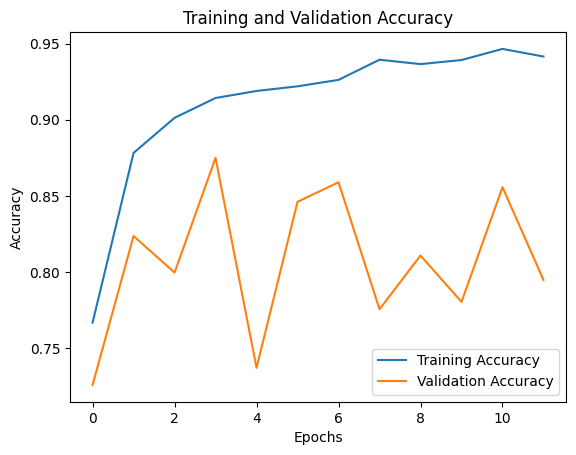

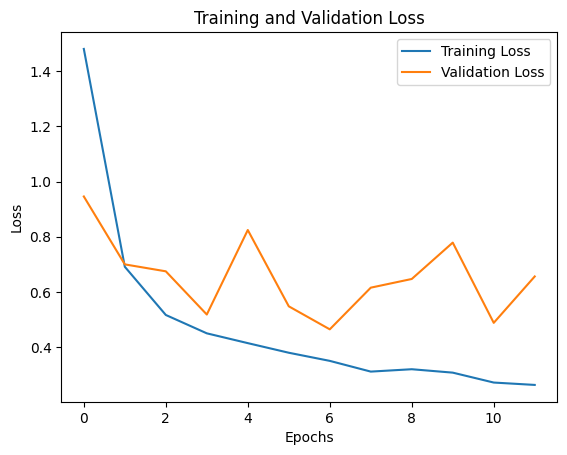

In [9]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [10]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 0.8080 - loss: 0.6031
Test Loss: 0.6561533808708191
Test Accuracy: 0.7948718070983887


In [12]:
import cv2
# Assuming you have a single image or a batch of images for prediction
img_path = "img.jpg"  # Example image path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))  # Resize to match the input shape
img = np.expand_dims(img, axis=-1)  # Add channel dimension (grayscale)
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Normalize

# Make a prediction
prediction = model.predict(img)
print(f"Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
Prediction: [[0.43577695]]


In [13]:
model.save('final_pneumonia_detection_model.h5')  # Save the entire model